Exploratory Data Analysis (EDA) <br>
*Satellite Imagery Based Property Valuation*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("../data/raw/train.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
df.shape

(16209, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Feature Overview:**  
The dataset includes structural attributes (e.g., square footage, bedrooms), quality indicators (grade, condition), neighborhood-level features, and geographic coordinates (latitude and longitude).

Text(0, 0.5, 'count')

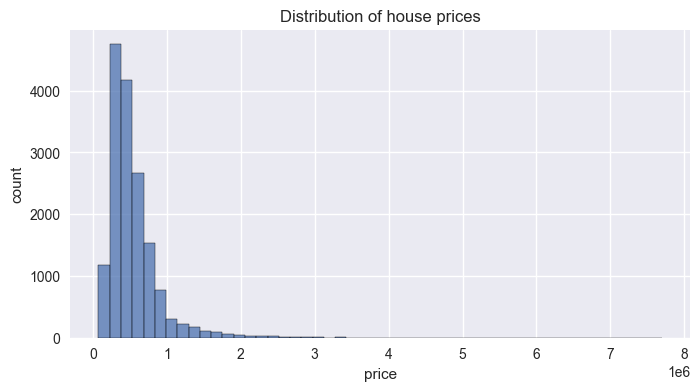

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df["price"],bins=50)
plt.title("Distribution of house prices")
plt.xlabel("price")
plt.ylabel("count")

**Price Distribution:**  
The distribution of house prices is right-skewed, with the majority of properties concentrated in lower price ranges and a small number of very high-priced homes. These luxury properties can disproportionately influence regression models and error metrics such as RMSE.

In [7]:
df.isnull().sum().sort_values(ascending=False)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 The dataset contains minimal to no missing values, indicating that it is largely clean and suitable for downstream modeling without extensive imputation.

In [8]:
df["log_price"]=np.log1p(df["price"])

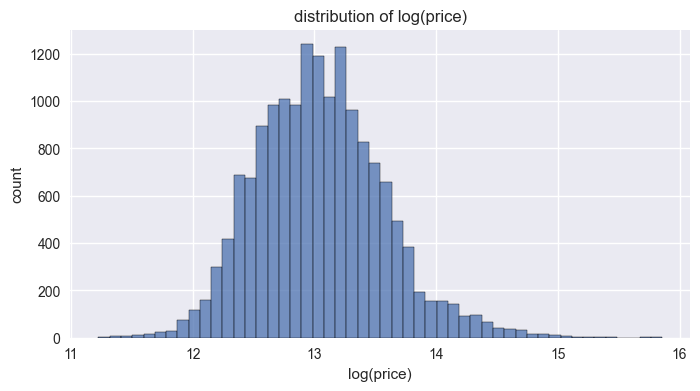

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df["log_price"], bins=50)
plt.title("distribution of log(price)")
plt.xlabel("log(price)")
plt.ylabel("count")
plt.show()

**Log-Transformed Price Distribution:**  
After applying a logarithmic transformation to the target variable, the price distribution becomes more symmetric, reducing the influence of extreme values and making it more suitable for regression modeling

In [13]:
num_df=df.select_dtypes(include=np.number)
corr=num_df.corr()["log_price"].sort_values(ascending=False)
print(corr)

log_price        1.000000
price            0.893444
grade            0.700249
sqft_living      0.693377
sqft_living15    0.615312
sqft_above       0.596904
bathrooms        0.550492
lat              0.452503
view             0.340868
bedrooms         0.337664
sqft_basement    0.315438
floors           0.305348
waterfront       0.161167
yr_renovated     0.119410
sqft_lot         0.098102
sqft_lot15       0.086677
yr_built         0.076376
long             0.052900
condition        0.033024
id              -0.007350
zipcode         -0.039803
Name: log_price, dtype: float64


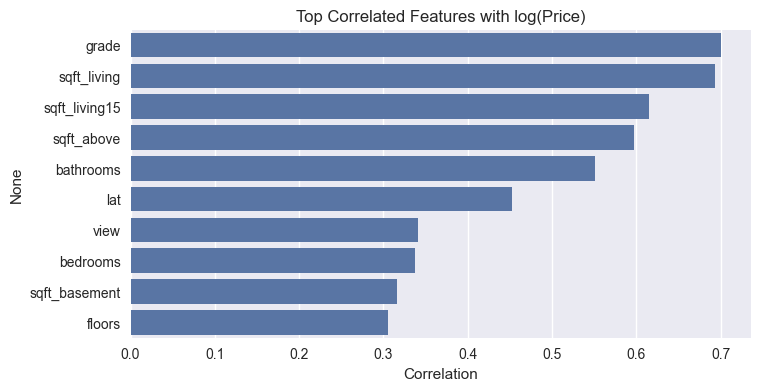

In [17]:
top_features = corr.drop(["log_price","price"]).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top Correlated Features with log(Price)")
plt.xlabel("Correlation")
plt.show()

**Key Feature Insights:**  
Correlation analysis indicates that construction quality (`grade`) and living area (`sqft_living`) are the strongest drivers of house prices. Neighborhood-level features such as `sqft_living15` also show high influence, highlighting the importance of surrounding context. Geographic coordinates exhibit moderate linear correlation, suggesting that raw latitude and longitude alone cannot fully capture spatial desirability—motivating the inclusion of satellite imagery for richer environmental representation.